In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from skimage.io import imread
from sklearn.cluster import KMeans

from skimage import img_as_float

Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [2]:
image = imread('parrots.jpg')

In [3]:
image[0]

array([[  4, 126,   5],
       [  2, 126,   2],
       [  2, 126,   2],
       ...,
       [  0,  56,   2],
       [  0,  53,   8],
       [  2,  55,  11]], dtype=uint8)

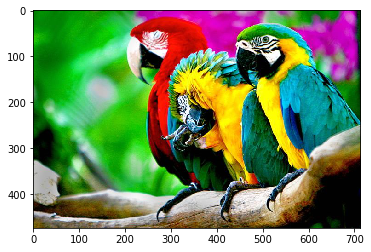

In [4]:
plt.imshow(image)

In [5]:
image = img_as_float(image)

In [6]:
image[0]

array([[0.01568627, 0.49411765, 0.01960784],
       [0.00784314, 0.49411765, 0.00784314],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.        , 0.21960784, 0.00784314],
       [0.        , 0.20784314, 0.03137255],
       [0.00784314, 0.21568627, 0.04313725]])

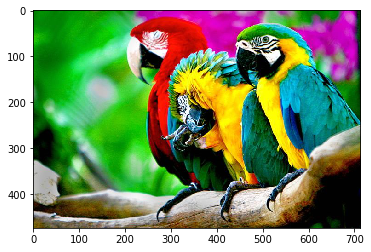

In [7]:
plt.imshow(image)

In [8]:
image.shape

(474, 713, 3)

Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [9]:
X = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))

In [10]:
X.shape

(337962, 3)

Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [11]:
kmeans = KMeans(init='k-means++', random_state=241)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [12]:
def fill_clusters(X, labels):
    X_med = np.empty(X.shape)
    X_mean = np.empty(X.shape)
    for label in np.unique(kmeans.labels_):
        for i in range(3):
            X_med[(kmeans.labels_ == label), i] = np.median(X[kmeans.labels_ == label][:, i])
            X_mean[(kmeans.labels_ == label), i] = np.mean(X[kmeans.labels_ == label][:, i])
    return X_med, X_mean

In [13]:
X_med, X_mean = fill_clusters(X, kmeans.labels_)

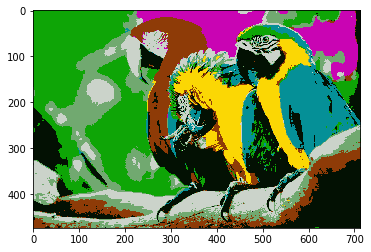

In [14]:
plt.imshow(X_med.reshape(image.shape))

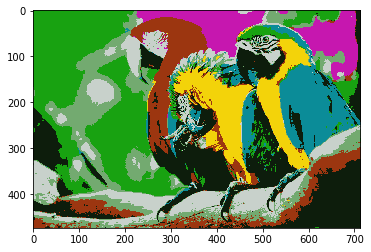

In [15]:
plt.imshow(X_mean.reshape(image.shape))

Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно (см. определение).

In [16]:
def psnr(X, X_noise):
    mse = np.mean((X - X_noise)**2)
    X_max = 1.0
    return 20 * np.log10(X_max) - 10 * np.log10(mse)

In [17]:
psnr(X, X_med)

18.1379714433961

In [18]:
psnr(X, X_mean)

18.436829014063576

Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

In [19]:
psnrs = []
for n_clusters in range(9, 21):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    kmeans.fit(X)
    X_med, X_mean = fill_clusters(X, kmeans.labels_)
    psnr_med = psnr(X, X_med)
    psnr_mean = psnr(X, X_mean)
    print(n_clusters, psnr_med, psnr_mean)
    psnrs.append((n_clusters, psnr_med, psnr_mean))
psnrs = np.array(psnrs)

9 18.81388735617062 19.112672735788138
10 19.417472515521055 19.64075663591531
11 19.84128407389954 20.127588746514583
12 20.304411065558547 20.5925163195166
13 20.792764442541802 21.021379679594364
14 21.041187112763314 21.29684656191451
15 21.40644006041166 21.60717171908997
16 21.676272681421985 21.863109812962833
17 21.919033084798265 22.119805992771255
18 22.129324222239887 22.335498740502754
19 22.360974944755693 22.522097823218104
20 22.480001314030766 22.699060150314878


In [20]:
answers = [psnrs[np.argwhere(psnrs[0:,1:] > 20)[0][0]][0].astype(int)]
print(answers)
with open("kmeans_answer1.txt", "w") as fout:
    fout.write(" ".join([str(num) for num in answers]))

[11]
